In [2]:
# Handle necessary imports
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
validation = pd.read_csv('data/validation.csv')

In [90]:
# Sample training data
train.head(10)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,...,250,1,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063
6,0,5,16,26739c29a9294f157930f3f5bb7f5dc9,1,u_D89EGm6FGGV,windows_chrome,27.46.201.*,216,217,...,90,OtherView,Na,5,7330,277,61,null,2259,"13866,10006,10111,10063"
7,0,0,21,404f5a6f3a1dde4ae1811646c065df3c,1,u_D9MLsHCazAr,windows_chrome,112.92.88.*,216,220,...,90,FirstView,Na,0,10717,294,39,null,2821,"13042,10024,10006,10110,10031,10063"
8,0,4,17,39095668ca6fd532b7c6d3dfad538997,1,u_Vh5_LAT0322yFOl,windows_ie,218.77.12.*,201,213,...,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,111,361e128affece850342293213691a043,3386,null
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,...,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"


In [91]:
# Look at the dataset fields
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

# <span style="color:blue">Data Exploration</span>. 

# 1. Basic Statistics

In [92]:
# Dataset statistics
dataset_stats = pd.DataFrame()
dataset_stats['advertiser'] = np.sort(train.advertiser.unique())
dataset_stats['impressions'] = train.groupby('advertiser').size().values
click = train.groupby('advertiser').click.value_counts()
dataset_stats['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values  
dataset_stats['cost'] = train.groupby('advertiser').payprice.sum().values
dataset_stats['CTR'] = (((dataset_stats.clicks / dataset_stats.impressions) * 100).round(3)).astype(str) + '%'
dataset_stats['CPM'] = (((dataset_stats.cost / dataset_stats.impressions) * 1000).round(2)).astype(str)
dataset_stats['eCPC'] = ((dataset_stats.cost / dataset_stats.clicks).round(2)).astype(str)

dataset_stats

,advertiser,impressions,clicks,cost,CTR,CPM,eCPC
0,1458,540293,451,37231239,0.083%,68909.35,82552.64
1,2259,146778,45,13649026,0.031%,92990.95,303311.69
2,2261,120619,37,10789152,0.031%,89448.2,291598.7
3,2821,231416,144,20625766,0.062%,89128.52,143234.49
4,2997,54487,251,3413227,0.461%,62642.96,13598.51
5,3358,304782,233,28145288,0.076%,92345.64,120795.23
6,3386,498554,358,38341028,0.072%,76904.46,107097.84
7,3427,454031,340,36820111,0.075%,81096.03,108294.44
8,3476,346778,175,27481402,0.05%,79247.82,157036.58


# 2. User feedback analysis

In [93]:
# 1. Analyzing CTR per day of the week

daily_CTR = pd.DataFrame()
daily_CTR['day'] = np.sort(train.weekday.unique())

click = train.groupby('weekday').click.value_counts()

imp_1458 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','weekday']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
daily_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
daily_CTR['clicks_3358'] = clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values

daily_CTR['CTR_1458'] = ((daily_CTR.clicks_1458 / daily_CTR.imps_1458) * 100).round(3)
daily_CTR['CTR_3358'] = ((daily_CTR.clicks_3358 / daily_CTR.imps_3358) * 100).round(3)

In [94]:
daily_CTR

,day,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,83994,33238,66,21,0.079,0.063
1,1,72204,30707,63,11,0.087,0.036
2,2,73810,26206,63,14,0.085,0.053
3,3,76509,81073,68,79,0.089,0.097
4,4,76835,41414,72,39,0.094,0.094
5,5,78485,58888,65,50,0.083,0.085
6,6,78456,33256,54,19,0.069,0.057


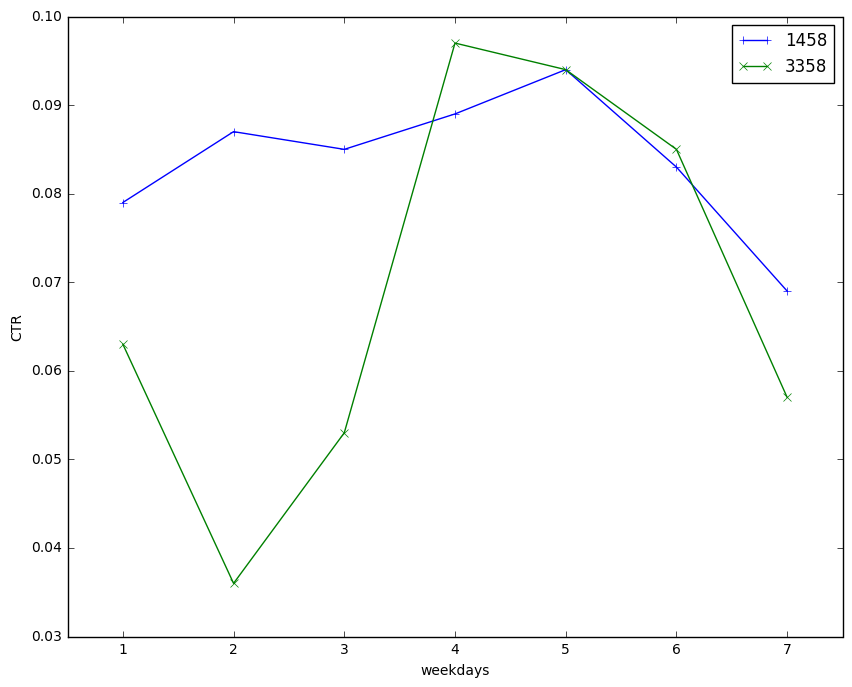

In [95]:
# Line plot of CTR per day of the week for advertiser 1458 & 3358
f, ax = plt.subplots(1)
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_3358.values,marker='x', label='3358')
plt.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
f.set_size_inches(10,8)
plt.draw()
plt.show()

In [96]:
# 2. Analyzing CTR per hour
hourly_CTR = pd.DataFrame()

hourly_CTR['hour'] = np.sort(train.hour.unique())

imp_1458 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','hour']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
hourly_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
click3358 = list(clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values)
click3358 = click3358[:4] + [0] + click3358[4:]
hourly_CTR['clicks_3358'] = click3358

hourly_CTR['CTR_1458'] = ((hourly_CTR.clicks_1458 / hourly_CTR.imps_1458) * 100).round(3)
hourly_CTR['CTR_3358'] = ((hourly_CTR.clicks_3358 / hourly_CTR.imps_3358) * 100).round(3)

In [97]:
hourly_CTR

,hour,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,25499,72359,23,70,0.090,0.097
1,1,11251,7583,8,8,0.071,0.105
2,2,6811,3527,14,2,0.206,0.057
3,3,7189,1447,6,2,0.083,0.138
4,4,3580,1307,6,0,0.168,0.000
5,5,4292,1103,4,1,0.093,0.091
6,6,5138,2797,2,4,0.039,0.143
7,7,10675,2835,5,1,0.047,0.035
8,8,15682,7960,9,6,0.057,0.075
9,9,19621,4700,18,1,0.092,0.021


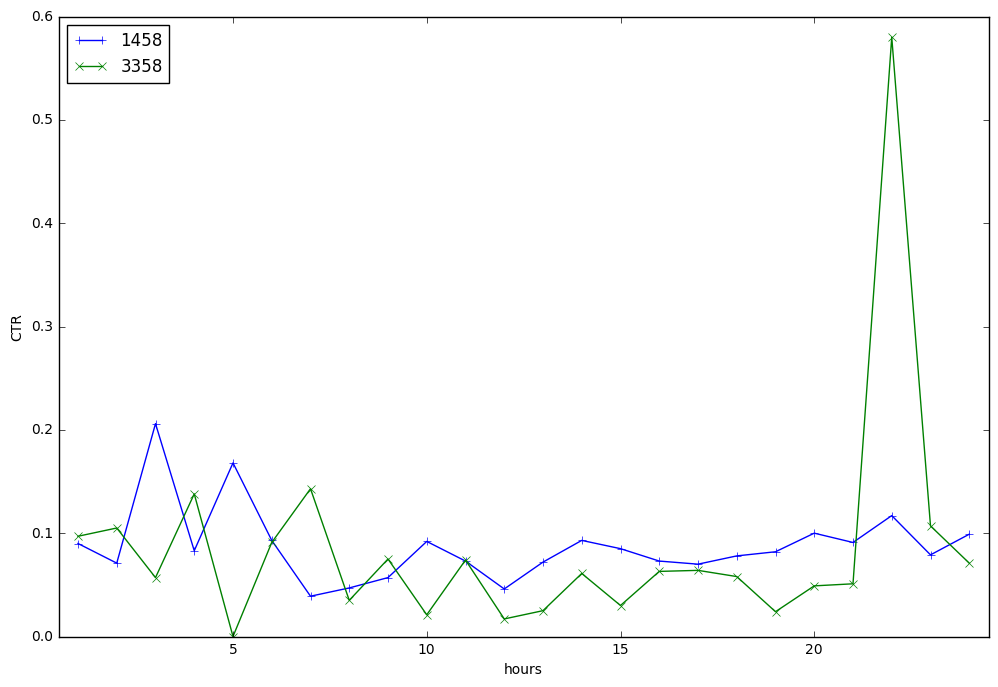

In [98]:
# Line plot of CTR per hour for advertiser 1458 & 3358
f, ax = plt.subplots(1)
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3358.values,marker='x', label='3358')
plt.legend(loc=2)
plt.ylabel('CTR')
plt.xlabel('hours')
ax.set_xlim(xmin = 0.5 , xmax = 24.5)
f.set_size_inches(12,8)
plt.draw()
plt.show()

In [99]:
# 3. Analyzing CTR per region
region_CTR = pd.DataFrame()

region_CTR['region'] = np.sort(train.region.unique())

imp_1458 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','region']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
region_CTR['clicks_1458'] = clickall_1458.groupby(level='region').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
region_CTR['clicks_3358'] = clickall_3358.groupby(level='region').sum().values

region_CTR['CTR_1458'] = ((region_CTR.clicks_1458 / region_CTR.imps_1458) * 100).round(3)
region_CTR['CTR_3358'] = ((region_CTR.clicks_3358 / region_CTR.imps_3358) * 100).round(3)

In [100]:
region_CTR

,region,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,7844,6162,9,13,0.115,0.211
1,1,23389,12157,17,6,0.073,0.049
2,2,8875,4820,3,2,0.034,0.041
3,3,27398,13246,20,15,0.073,0.113
4,15,16674,7968,18,7,0.108,0.088
5,27,7616,3754,5,3,0.066,0.080
6,40,20449,8965,9,6,0.044,0.067
7,55,12091,4823,11,2,0.091,0.041
8,65,12566,5684,11,5,0.088,0.088
9,79,14300,9523,17,9,0.119,0.095


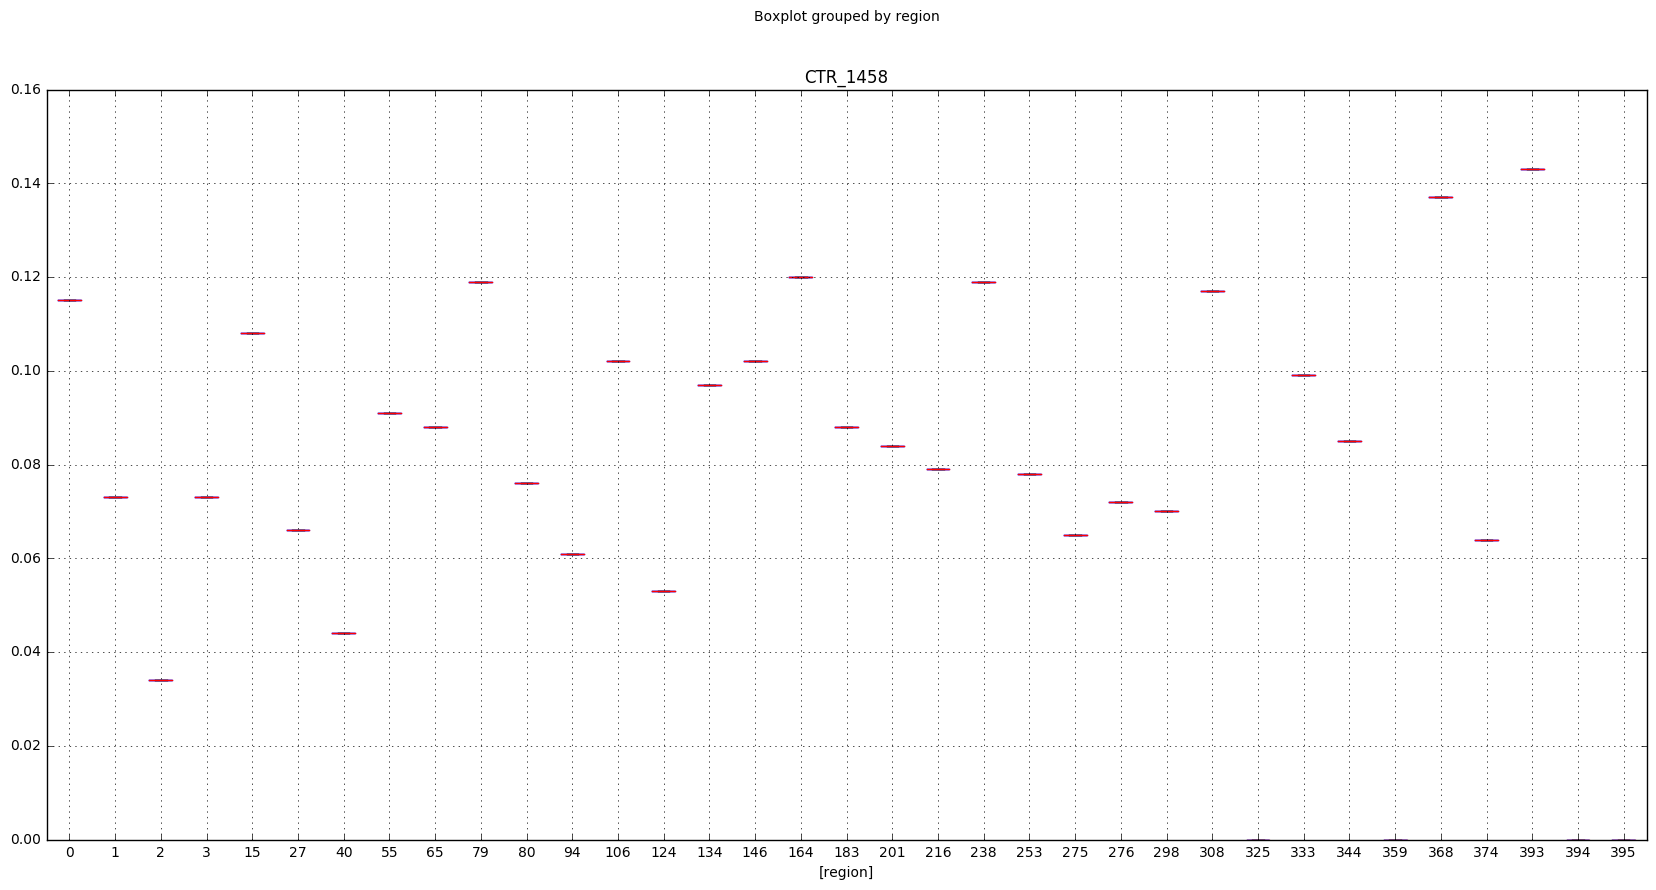

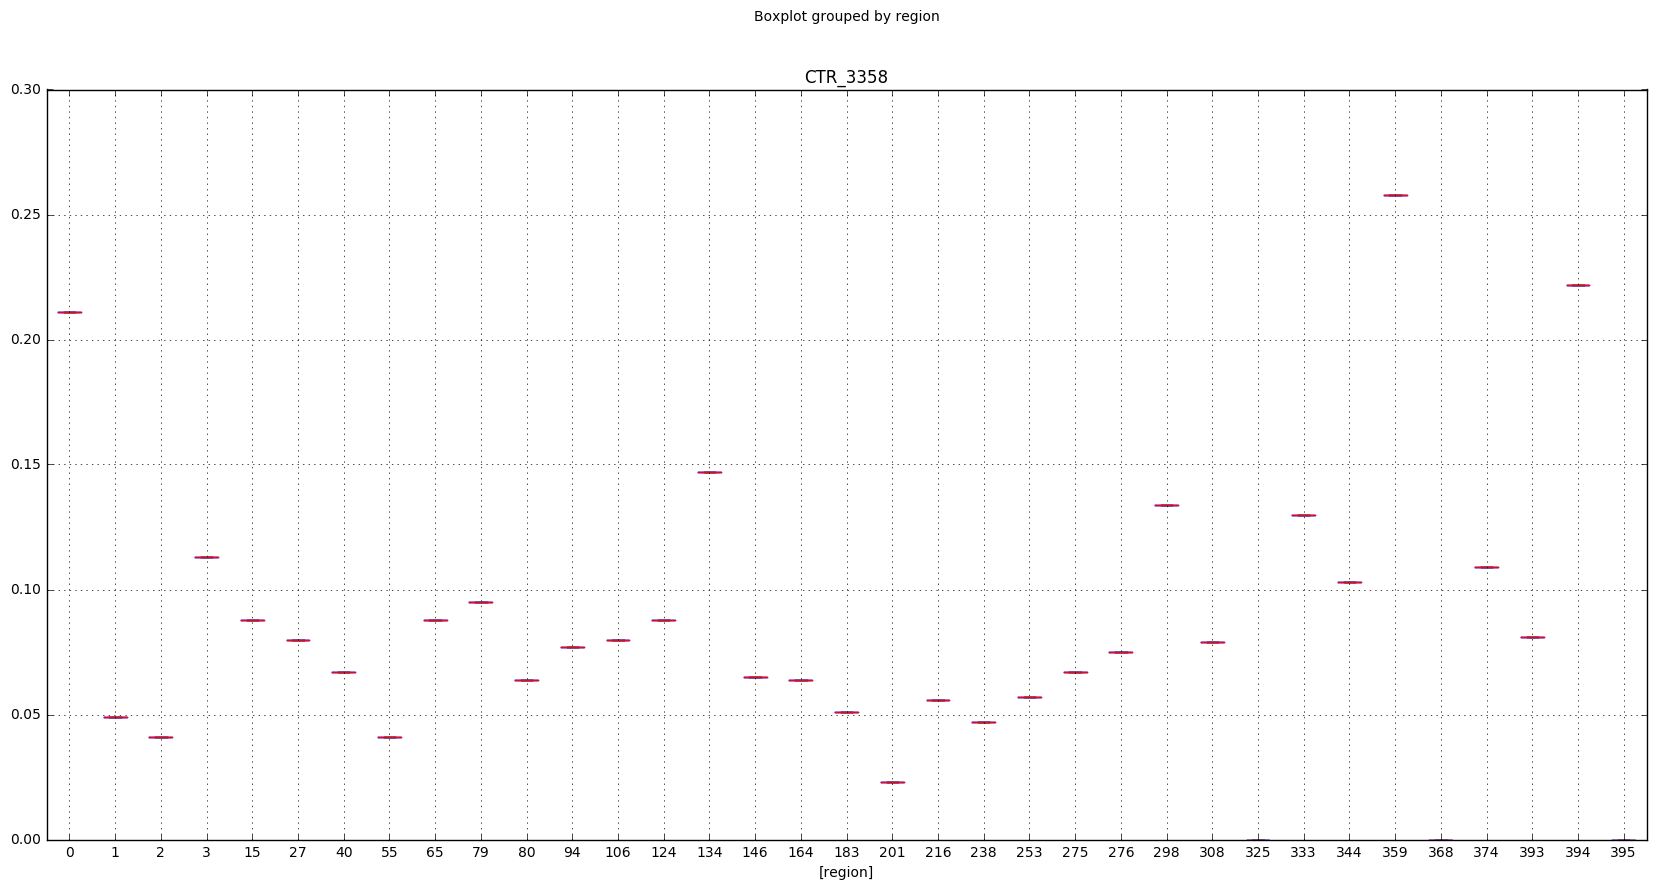

In [101]:
# Boxplot of CTR per region for advertiser 1458 & 3358
a1=region_CTR[['region','CTR_1458']]
ax1 = a1.boxplot(by='region', return_type='axes',figsize=(20,10))
a2 = region_CTR[['region','CTR_3358']]
a2.boxplot(by='region',figsize=(20,10))

In [102]:
# 4. Analyzing CTR per ad exchange
adexchange_CTR = pd.DataFrame()

adexchange_CTR['ad_exchange'] = np.sort(train.adexchange.unique())
adexchange_CTR = adexchange_CTR.drop([3,4])
imp_1458 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','adexchange']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_1458'] = clickall_1458.groupby(level='adexchange').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_3358'] = clickall_3358.groupby(level='adexchange').sum().values

adexchange_CTR['CTR_1458'] = ((adexchange_CTR.clicks_1458 / adexchange_CTR.imps_1458) * 100).round(3)
adexchange_CTR['CTR_3358'] = ((adexchange_CTR.clicks_3358 / adexchange_CTR.imps_3358) * 100).round(3)

In [103]:
adexchange_CTR

,ad_exchange,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,1,182219,159379,146,146,0.080,0.092
1,2,160460,93691,126,48,0.079,0.051
2,3,197614,51712,179,39,0.091,0.075


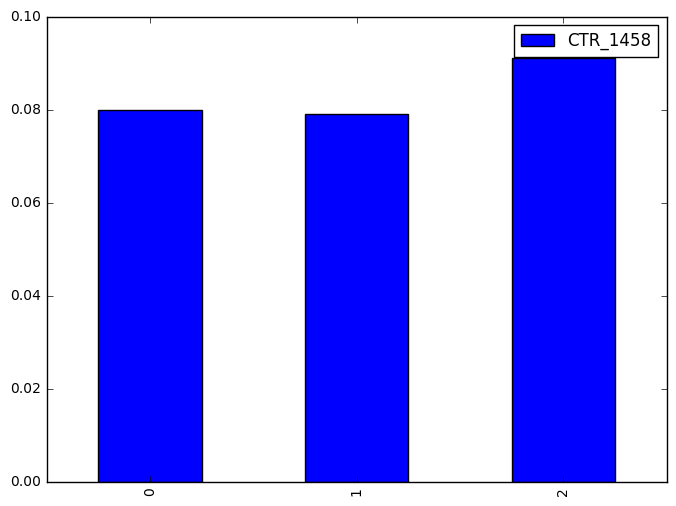

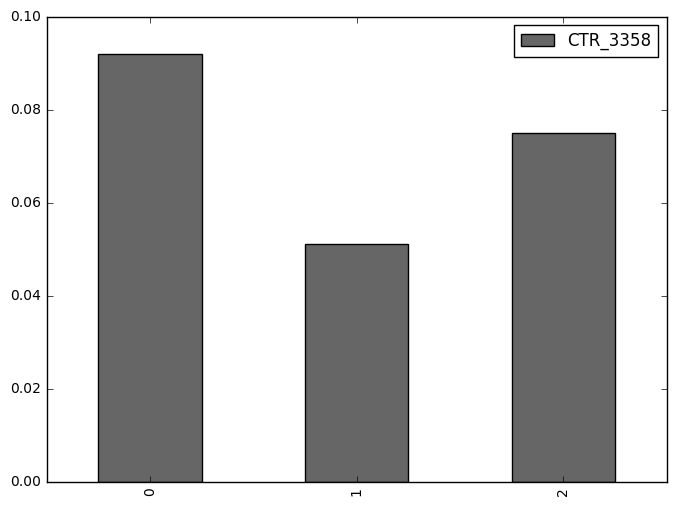

In [104]:
# Boxplot of CTR per ad exchange for advertiser 1458 & 3358
a1=adexchange_CTR[['ad_exchange','CTR_1458']]
ax1 = a1.plot(by='ad_exchange',kind='bar',figsize=(8,6))
a2 = adexchange_CTR[['ad_exchange','CTR_3358']]
a2.plot(by='ad_exchange',kind='bar',colormap='Accent_r',figsize=(8,6))

In [105]:
# 4. Analyzing CTR per user agent
useragent_CTR = pd.DataFrame()

useragent_CTR['useragent'] = np.sort(train.useragent.unique())
useragent_CTR = useragent_CTR.drop([12,18,25])
imp_1458 = train.groupby('useragent').advertiser.value_counts()
useragent_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('useragent').advertiser.value_counts()
imp_3358 = list(imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values)
imp_3358 = imp_3358[:22] + [0] + imp_3358[22:]
useragent_CTR['imps_3358'] = imp_3358

click = train.groupby(['advertiser','useragent']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
useragent_CTR['clicks_1458'] = clickall_1458.groupby(level='useragent').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
clickall_3358 = list(clickall_3358.groupby(level='useragent').sum().values)
clickall_3358 = clickall_3358[:22] + [0] + clickall_3358[22:]
useragent_CTR['clicks_3358'] = clickall_3358

useragent_CTR['CTR_1458'] = ((useragent_CTR.clicks_1458 / useragent_CTR.imps_1458) * 100).round(3)
useragent_CTR['CTR_3358'] = ((useragent_CTR.clicks_3358 / useragent_CTR.imps_3358) * 100).round(3)

In [106]:
useragent_CTR.fillna(0.0)

,useragent,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,android_chrome,74,101,1,1,1.351,0.990
1,android_firefox,5,4,0,0,0.000,0.000
2,android_ie,3,2,0,0,0.000,0.000
3,android_maxthon,6,5,0,0,0.000,0.000
4,android_opera,96,145,0,0,0.000,0.000
5,android_other,243,233,2,1,0.823,0.429
6,android_safari,3044,3813,17,15,0.558,0.393
7,android_sogou,1,1,0,0,0.000,0.000
8,ios_other,3,4,0,0,0.000,0.000
9,ios_safari,101,65,0,1,0.000,1.538


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A82C5F1080>], dtype=object)

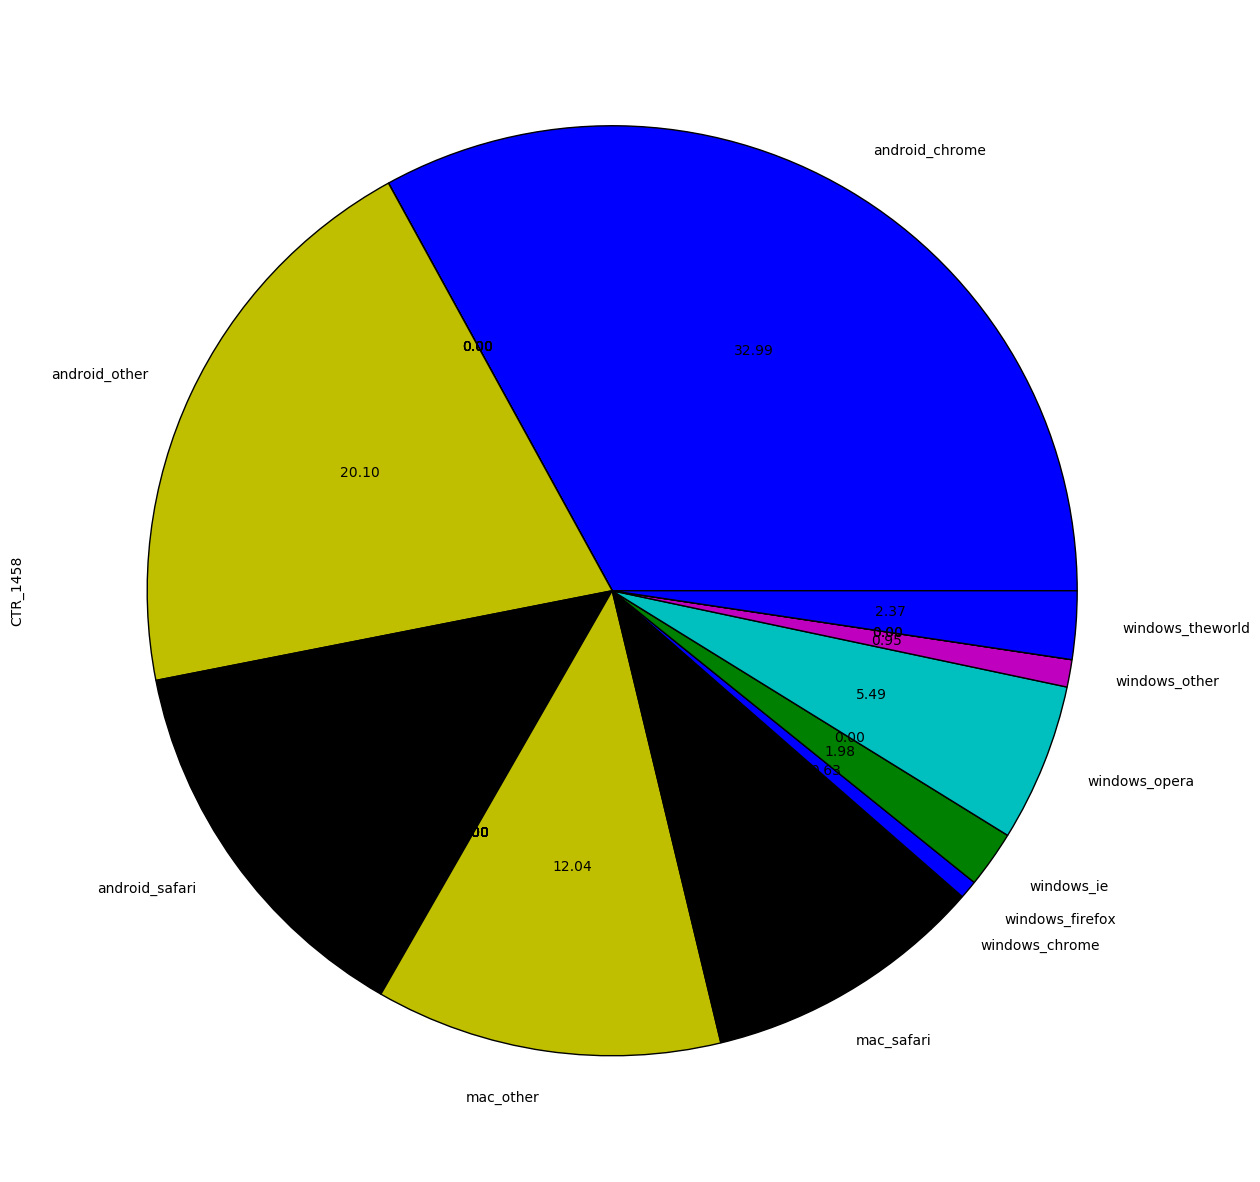

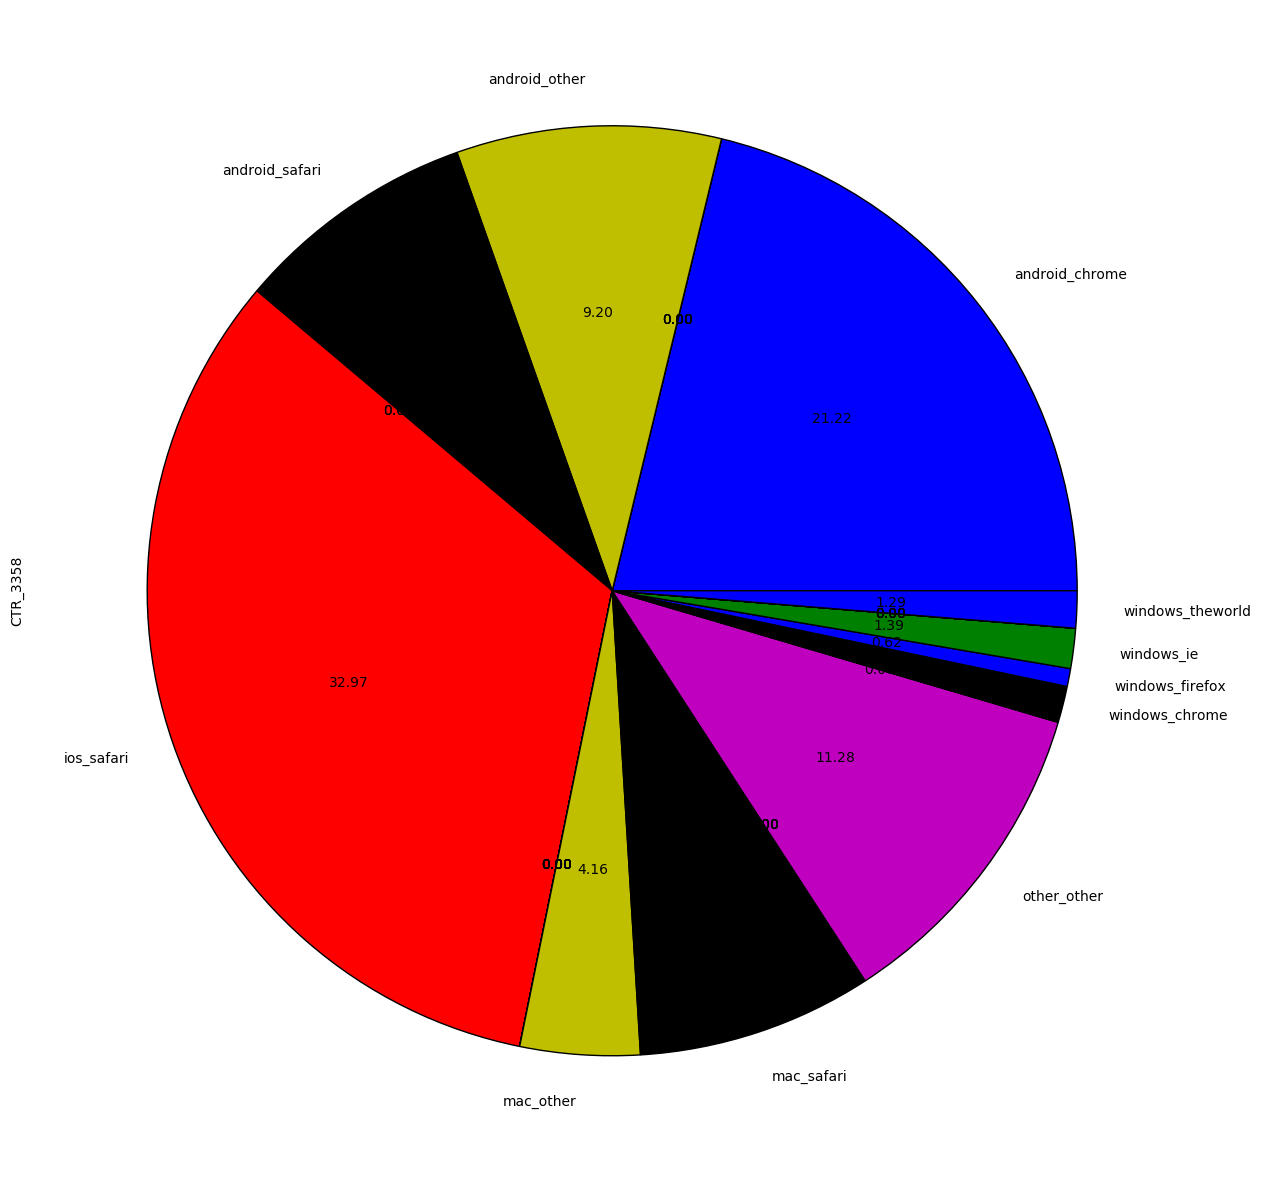

In [107]:
# Boxplot of CTR per user agent for advertiser 1458 & 3358
a1=useragent_CTR[['useragent','CTR_1458']]
a1 = a1.set_index('useragent')
a1.plot(subplots=True, kind='pie',figsize=(15,15), autopct='%0.2f',legend=False)
a2 = useragent_CTR[['useragent','CTR_3358']]
a2 = a2.set_index('useragent')
a2.plot(subplots=True, kind='pie',figsize=(15,15), autopct='%0.2f',legend=False)

# <span style="color:blue">Basic Bidding Strategies</span>. 

# 1. Constant bidding

In [4]:
def constant_bidding(constant):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
        
    for click, pay_price in validation[['click','payprice']].values:
            if constant > pay_price:
                impression += 1
                clicks += click
                cost += pay_price
            if cost >= budget:
                break
    return impression, clicks, cost

const = pd.DataFrame()
const['constants'] = np.arange(2,302,2)

im = []
clks = []
ct = []
for con in const['constants']:
    [imps, clicks, cost] = constant_bidding(con)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
const['imps_won'] = im
const.imps_won = const.imps_won.astype(int)
const['total_spend'] = ct
const['clicks'] = clks
const['CTR'] = (const.clicks/const.imps_won * 100).round(4).astype(str)
const['CPM'] = (const.total_spend/const.imps_won * 1000).round(2).astype(str)
const['CPC'] = (const.total_spend/const.clicks).round(2).astype(str)

In [8]:
const

,constants,imps_won,total_spend,clicks,CTR,CPM,CPC
0,2,360,289.0,0,0.0,802.78,inf
1,4,882,1417.0,0,0.0,1606.58,inf
2,6,7646,33986.0,1,0.0131,4444.94,33986.0
3,8,10850,54653.0,8,0.0737,5037.14,6831.62
4,10,13364,76078.0,8,0.0599,5692.76,9509.75
5,12,17913,123515.0,8,0.0447,6895.27,15439.38
6,14,21058,162741.0,10,0.0475,7728.23,16274.1
7,16,24081,206522.0,11,0.0457,8576.14,18774.73
8,18,28559,280440.0,12,0.042,9819.67,23370.0
9,20,32248,348357.0,13,0.0403,10802.44,26796.69


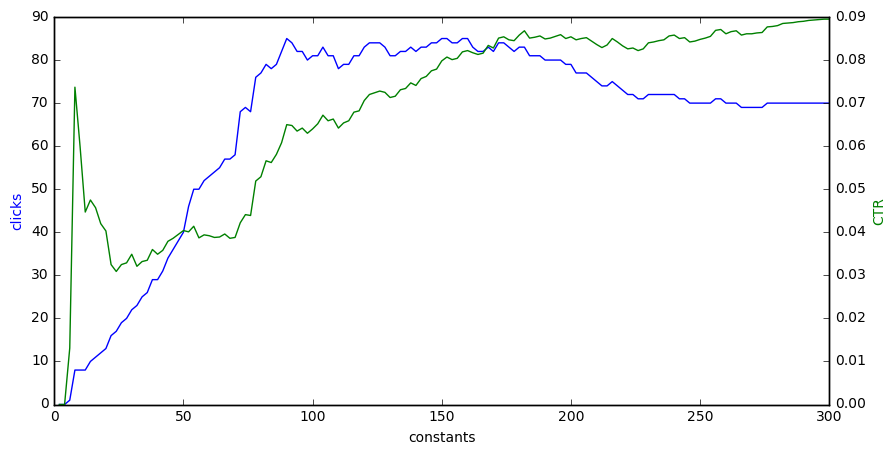

In [9]:
b = const[['clicks','constants']]
a = const[['constants','CTR']]
b = b.astype(float)
a = a.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(b.constants,b.clicks)
ax1.set_xlabel('constants')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.constants, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
fig.savefig('constant.PNG', dpi=200)
plt.show()

# 2. Random bidding

In [10]:
from random import randrange

def random_bidding(upper_bound):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
    
    for click,pay_price in validation[['click','payprice']].values:  
        rand_no = randrange(upper_bound)
        if rand_no > pay_price:
            impression += 1
            clicks += click
            cost += pay_price
        if cost >= budget:
                break
    return impression, clicks, cost
            
randm = pd.DataFrame()
randm['upper_bound'] = np.arange(2,302,2)

im = []
clks = []
ct = []
for upper in randm['upper_bound']:
    [imps, clicks, cost] = random_bidding(upper)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
randm['imps_won'] = im
randm.imps_won = randm.imps_won.astype(int)
randm['total_spend'] = ct
randm['clicks'] = clks
randm['CTR'] = (randm.clicks/randm.imps_won * 100).round(4).astype(str)
randm['CPM'] = (randm.total_spend/randm.imps_won * 1000).round(2).astype(str)
randm['CPC'] = (randm.total_spend/randm.clicks).round(2).astype(str)

In [11]:
randm

,upper_bound,imps_won,total_spend,clicks,CTR,CPM,CPC
0,2,40,0.0,0,0.0,0.0,nan
1,4,309,378.0,0,0.0,1223.3,inf
2,6,691,1461.0,0,0.0,2114.33,inf
3,8,2623,10825.0,1,0.0381,4126.95,10825.0
4,10,4339,20217.0,3,0.0691,4659.37,6739.0
5,12,6190,32333.0,5,0.0808,5223.42,6466.6
6,14,8019,47313.0,3,0.0374,5900.11,15771.0
7,16,9663,62586.0,4,0.0414,6476.87,15646.5
8,18,11520,81395.0,4,0.0347,7065.54,20348.75
9,20,13154,102130.0,7,0.0532,7764.18,14590.0


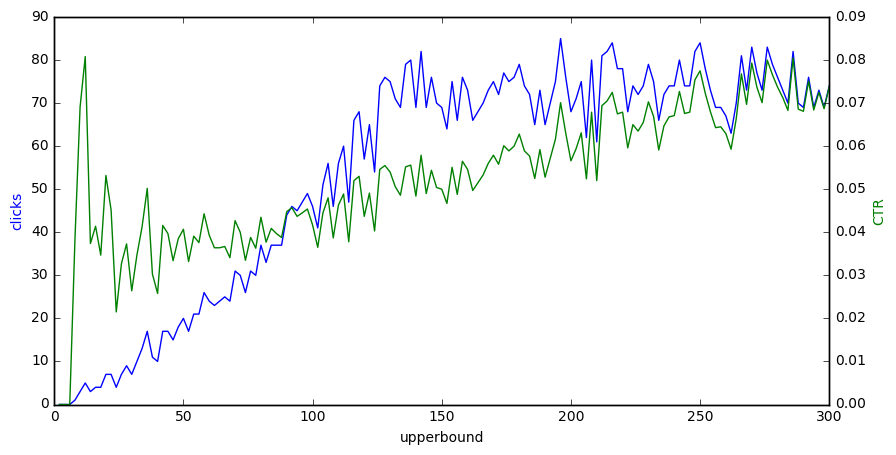

In [12]:
b = randm[['clicks','upper_bound']]
a = randm[['upper_bound','CTR']]
b = b.astype(float)
a = a.astype(float)
fig, ax1 = plt.subplots()
ax1.plot(b.upper_bound,b.clicks)
ax1.set_xlabel('upperbound')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.upper_bound, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
fig.savefig('random.PNG', dpi=100)
plt.show()

# <span style="color:blue">Linear Bidding Strategies</span>. 

# 1. pCTR estimation using Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
import time

In [14]:
# Negative sampling to fix imbalance
def negsample(data, ratio=1):
    conv = data[data.click == 1]
    oth = data[data.click == 0].sample(n=ratio*len(conv))
    return pd.concat([conv, oth]).sample(frac=1) #shuffle data

# neg_sam_train = negsample(train)
# neg_sam_val = negsample(validation)

# y_train_sampled = neg_sam_train.click
# X_train_sampled = neg_sam_train.drop('click', axis=1)

# y_val_sampled = neg_sam_val.click
# X_val_sampled = neg_sam_val.drop('click', axis=1)

# w = len(neg_sam_train)/ len(train)

# print("Negative sample ratio", w)

In [15]:
# Predict CTR
X_train = train.drop(['click','bidid','logtype','userid','IP','domain',
                'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
y_train = train.click

X_val = validation.drop(['click','bidid','logtype','userid','IP','domain',
                'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
y_val = validation.click
X_test = test.drop(['bidid','logtype','userid','IP','domain',
                'url','urlid','slotid','creative','keypage'], axis=1)

In [16]:
# Handling categorical data with one hot encoding

# 1. Encode day of week
def enc_day(X):
    X = pd.concat([X,pd.get_dummies(X.weekday,prefix='day')],axis=1)
    X = X.drop('weekday',axis=1)
    return X

# 2. Encode hours
def enc_hrs(X):
    X = pd.concat([X,pd.get_dummies(X.hour,prefix='hour')],axis=1)
    X = X.drop('hour',axis=1)
    return X

# Split user agent into 2 ~ OS and browser
def enc_OS_browser(X):
    df = pd.DataFrame(X.useragent.str.split('_',1).tolist(),
                                   columns = ['OS','browser'])
    X = pd.concat([X,df],axis=1)

    # 3. Encode OS
    X = pd.concat([X,pd.get_dummies(X.OS,prefix='OS')],axis=1)
    X = X.drop('OS',axis=1)

    # 4. Encode browser
    X = pd.concat([X,pd.get_dummies(X.browser,prefix='browser')],axis=1)
    X = X.drop('browser',axis=1)
    
    X = X.drop('useragent',axis=1)
    return X

In [17]:
# 5. Encode region
def enc_region(X):
    X = pd.concat([X,pd.get_dummies(X.region,prefix='region')],axis=1)
    X = X.drop('region',axis=1)
    return X

# 6. Encode adexchange
def enc_adexchange(X):
    X = pd.concat([X,pd.get_dummies(X.adexchange,prefix='adexchange')],axis=1)
    X = X.drop('adexchange',axis=1)
    return X

In [18]:
# 7. Encode slotwidth
def enc_slotwidth(X):
    X = pd.concat([X,pd.get_dummies(X.slotwidth,prefix='slotwidth')],axis=1)
    X = X.drop('slotwidth',axis=1)
    return X

# 8. Encode slotheight
def enc_slotheight(X):
    X = pd.concat([X,pd.get_dummies(X.slotheight,prefix='slotheight')],axis=1)
    X = X.drop('slotheight',axis=1)
    return X

In [19]:
# 9. Encode slotvisibility
def enc_slotvisibility(X):
    X = pd.concat([X,pd.get_dummies(X.slotvisibility,prefix='slotvisibility')],axis=1)
    X = X.drop('slotvisibility',axis=1)
    return X

# 10. Encode slotformat
def enc_slotformat(X):
    X = pd.concat([X,pd.get_dummies(X.slotformat,prefix='slotformat')],axis=1)
    X = X.drop('slotformat',axis=1)
    return X

# 11. Encode advertiser
def enc_advertiser(X):
    X = pd.concat([X,pd.get_dummies(X.advertiser,prefix='advertiser')],axis=1)
    X = X.drop('advertiser',axis=1)
    return X

In [20]:
# 12. Encoding slotprice into buckets
def enc_slotprice(X):
    bins = pd.DataFrame()
    bins['slotprice_bins'] = pd.cut(X.slotprice.values,5, labels=[1,2,3,4,5])

    X = pd.concat([X,bins],axis=1)
    X = pd.concat([X,pd.get_dummies(X.slotprice_bins,prefix='slotprice')],axis=1)

    X = X.drop('slotprice',axis=1)
    X = X.drop('slotprice_bins',axis=1)
    bins.pop('slotprice_bins')
    return X

In [21]:
# 13. Encoding user tags
def enc_usertag(X):
    a = pd.DataFrame(X.usertag.str.split(',').tolist())
    usertag_df = pd.DataFrame(a)
    usertag_df2 = pd.get_dummies(usertag_df,prefix='usertag')
    usertag_df2 = usertag_df2.groupby(usertag_df2.columns, axis=1).sum()
    X = pd.concat([X, usertag_df2], axis=1)
    X = X.drop('usertag', axis=1)
    return X

In [22]:
# 14. Encoding cities
def enc_city(X):
    X = pd.concat([X,pd.get_dummies(X.city,prefix='city')],axis=1)
    X = X.drop('city',axis=1)
    return X

In [23]:
start_encode = time.time()

def encode_labels(X):
    X = enc_day(X)
    X = enc_hrs(X)
    X = enc_OS_browser(X)
    X = enc_region(X)
    X = enc_adexchange(X)
    X = enc_slotwidth(X)
    X = enc_slotheight(X)
    X = enc_slotvisibility(X)
    X = enc_slotformat(X)
    X = enc_advertiser(X)
#     X = enc_city(X)
    X = enc_slotprice(X)
    return X

print('---Started Encoding---')
# one hot encode train and val
X_train = encode_labels(X_train)
X_val = encode_labels(X_val)
print("Encoding Finished in %s minutes" % round(((time.time() - start_encode)/60),2))

---Started Encoding---
Encoding Finished in 0.41 minutes


In [24]:
X_test = encode_labels(X_test)
X_test = enc_usertag(X_test)

In [25]:
# Very slow and mem heavy encoding
start_usertag = time.time()
print('---Encoding Train Usertag---')

X_train = enc_usertag(X_train)

print("Encoded Train Usertag in %s minutes" % round(((time.time() - start_usertag)/60),2))

---Encoding Train Usertag---
Encoded Train Usertag in 3.11 minutes


In [26]:
start_usertag_val = time.time()
print('---Encoding Validation Usertag---')

X_val = enc_usertag(X_val)
print("Encoded Validation Usertag in %s minutes" % round(((time.time() - start_usertag_val)/60),2))

---Encoding Validation Usertag---
Encoded Validation Usertag in 0.29 minutes


In [27]:
# Hyperparameter tuning
# Model ~ Logistic Regression
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import auc,roc_curve

def tune_logreg():
    params = {'C' :[0.001,0.01,0.1,1.0,10.0]}
    lr = LogisticRegression(class_weight='balanced')    
    strk = StratifiedKFold(3, random_state=2048, shuffle=True)
    
    gr = GridSearchCV(lr, params, scoring='roc_auc', cv=strk, verbose=3)
    gr.fit(X_train, y_train)
    return gr.cv_results_

# Switch to True to tune
if False:
    lr_results = tune_logreg()


In [136]:
# Best params
min_idx = np.argmax(lr_results['mean_test_score'])
lr_results['params'][min_idx]

{'C': 0.001}

In [146]:
tuning_lr_df = pd.DataFrame(lr_results)
tuning_lr_df = tuning_lr_df[['rank_test_score','param_C','mean_fit_time','std_fit_time','mean_test_score','std_test_score']]
tuning_lr_df.columns = ['rank','C','mean time','std time','mean AUC','std AUC']
tuning_lr_df

,rank,C,mean time,std time,mean AUC,std AUC
0,1,0.001,60.332912,2.825690,0.829984,0.001177
1,2,0.01,117.853973,7.627416,0.829016,0.000698
2,3,0.1,177.978387,54.880737,0.826775,0.001130
3,4,1,318.417584,25.438356,0.825664,0.001370
4,5,10,543.256229,55.809014,0.825096,0.001132


In [28]:
# Fit the classification model and predict on val
# Uses balanced class weights to resolve data imbalance
clf_l2_LR = LogisticRegression(class_weight='balanced', C = 0.001)
y_pred = clf_l2_LR.fit(X_train, y_train).predict(X_val)

In [29]:
# Fit the classification model and predict on test
# Uses balanced class weights to resolve data imbalance
clf_l2_LR_test = LogisticRegression(class_weight='balanced', C = 0.001)
y_pred_test = clf_l2_LR_test.fit(X_train, y_train).predict(X_test)

In [30]:
# pCTR test Values
predprobs_test = clf_l2_LR_test.predict_proba(X_test)
pCTR_test = pd.DataFrame(predprobs_test)

In [31]:
# pCTR val Values
predprobs = clf_l2_LR.predict_proba(X_val)
pCTR = pd.DataFrame(predprobs)

In [32]:
# Before recalibration
pCTR[1][:5]

0    0.200189
1    0.903826
2    0.527787
3    0.523238
4    0.373937
Name: 1, dtype: float64

In [33]:
# re calibrated predictions
# q = p / (p + (1-p) / w

pred =[]
pred_test=[]

a = len(train) / 2 * np.bincount(train.click)
w = a[1] / a[0]

for p in pCTR[1]:
    pred.append( p / (p + ((1-p)/w)))

for p in pCTR_test[1]:
    pred_test.append( p / (p + ((1-p)/w)))

In [34]:
# Save pCTR values
pd.DataFrame(pred).to_csv('LR_pCTR_val.csv')
pd.DataFrame(pred_test).to_csv('LR_pCTR_test.csv')

In [35]:
# Model AUC score
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve([click for click in validation.click], pred)
print('AUC accuracy:',metrics.auc(fpr, tpr))

AUC accuracy: 0.829330781961


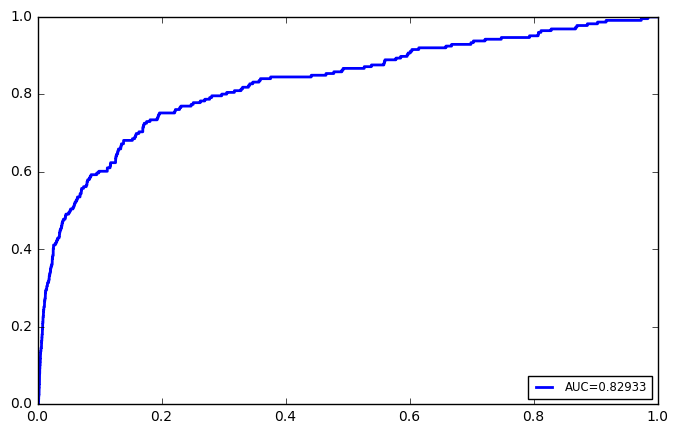

In [36]:
f, axes = plt.subplots(1, figsize=(8, 5))
lab = 'AUC=%.5f' % metrics.auc(fpr, tpr)
axes.step(fpr, tpr, lw=2,label=lab)
axes.legend(loc='lower right', fontsize='small')
plt.show()

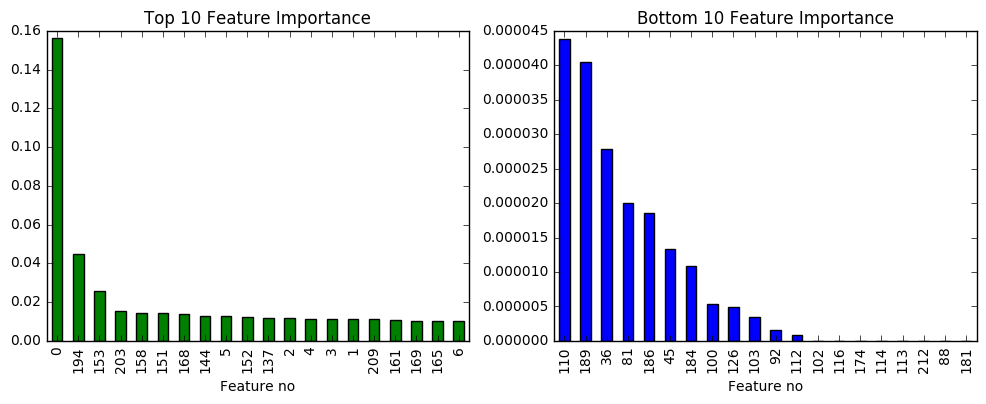

In [40]:
# Feature importances
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
importances = rf.fit(X_train, y_train).feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

important = list()
for f in range(X_train.shape[1]):
        important.append([indices[f],importances[indices[f]]])
        
important_df = pd.DataFrame(important)
important_df.columns = ['Feature no','Importance']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
important_df[:20].plot(kind='bar', x='Feature no', color='g',ax=axes[0], title='Top 10 Feature Importance', legend=False)
important_df[200:].plot(kind='bar', x='Feature no', color='b',ax=axes[1], title='Bottom 10 Feature Importance', legend=False)

In [41]:
# Insignificant features
least_impdf = pd.DataFrame(important_df[214:])
least_impdf['Feature names'] = X_train.columns[[important_df[214:]['Feature no']]]
least_impdf[['Feature names','Importance']]

,Feature names,Importance
214,usertag_10118,0.0
215,slotheight_150,0.0
216,slotheight_125,0.0
217,usertag_15398,0.0
218,slotwidth_125,0.0
219,usertag_10130,0.0


In [42]:
# Fit the classification model on feature subset
X_train_1 = X_train.drop(X_train.columns[[important_df[214:]['Feature no']]], axis=1)
X_val_1 = X_val.drop(X_val.columns[[important_df[214:]['Feature no']]], axis=1)

clf_l2_LR_1 = LogisticRegression(class_weight='balanced', C = 0.001)
y_pred_1 = clf_l2_LR.fit(X_train_1, y_train).predict(X_val_1)
predprobs_1 = clf_l2_LR.predict_proba(X_val_1)
pCTR_1 = pd.DataFrame(predprobs_1)
pred_1 =[]

a = len(train) / 2 * np.bincount(train.click)
w = a[1] / a[0]

for p in pCTR_1[1]:
    pred_1.append( p / (p + ((1-p)/w)))
    
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve([click for click in validation.click], pred_1)
print('AUC accuracy after feature selection:',metrics.auc(fpr_1, tpr_1))

AUC accuracy after feature selection: 0.829324946724


# 2. Linear Bidding Function
bid = base_bid * pCTR / avgCTR

# 3. Non Linear Bidding Function
bid = base_bid * (pCTR / avgCTR) ^ 2

In [313]:
# Average CTR
avgCTR = (train.click.sum() / train.logtype.sum())

# Bid generator
def bid_gen(strat_type, lowerbound, upperbound, step):

    bids = []
    base_bids = np.arange(lowerbound,upperbound,step)
    
    for base_bid in base_bids:
        for i in range(0, len(pred)):
            if strat_type == 'linear':
                bid = base_bid * (pred[i] / avgCTR)
                bids.append(bid)         
            elif strat_type == 'nonlinear':
                bid = base_bid * (pred[i] / avgCTR) ** 2
                bids.append(bid)         
    bid_chunks = [bids[x:x+len(pred)] for x in range(0, len(bids), len(pred))]
    return bid_chunks, base_bids

# Bidding function
def bidding(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0    
    budget = 6250000    
    
    bool_check = bids >= validation.payprice
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
            if cost >= budget:
                break
    return impression, clicks, cost

# Change strategy here
strat = 'nonlinear'
bid_chunks, base_bids = bid_gen(strat, 2, 302, 2)

bid_df = pd.DataFrame()
bid_df['bid'] = base_bids
bid_df['bidding_strategy'] = strat

im = []
clks = []
ct = []

starttime = time.time()
print("Starting %s Bidding" % strat)

for bids in bid_chunks:
    [imps, clicks, cost] = bidding(bids)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
    
bid_df['imps_won'] = im
bid_df.imps_won = bid_df.imps_won.astype(int)
bid_df['total_spend'] = ct
bid_df['clicks'] = clks
bid_df['CTR'] = (bid_df.clicks/bid_df.imps_won * 100).round(4).astype(str)
bid_df['CPM'] = (bid_df.total_spend/bid_df.imps_won * 1000).round(2).astype(str)
bid_df['CPC'] = (bid_df.total_spend/bid_df.clicks).round(2).astype(str)

print(" %s bidding finished in %s minutes" % (strat,round(((time.time() - starttime)/60),2)))

0.0007539649884458758

In [360]:
# Store results in separate dataframes
if strat == 'nonlinear':
    nonlin = bid_df
elif strat == 'linear':
    lin = bid_df

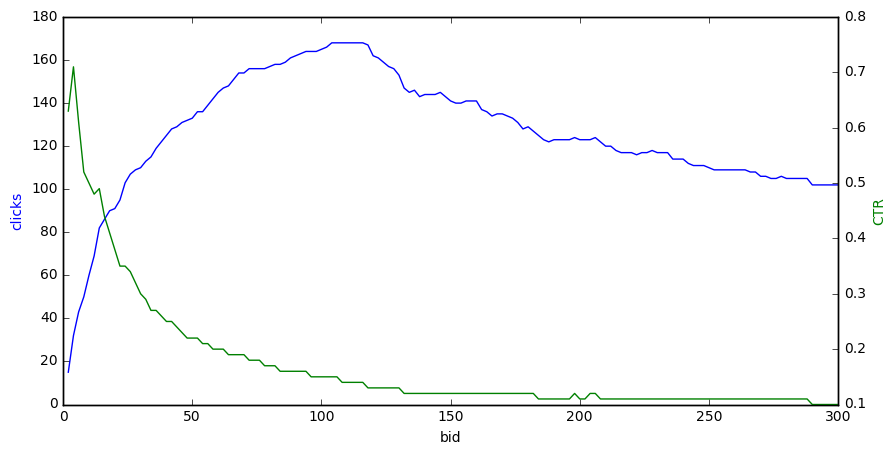

In [324]:
# Linear bidding performance
b = lin[['clicks','bid']].astype(float)
a = lin[['bid','CTR']].astype(float)

fig, ax1 = plt.subplots()
ax1.plot(b.bid,b.clicks)
ax1.set_xlabel('bid')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.bid, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
fig.savefig('linear.PNG', dpi=100)
plt.show()

In [335]:
# Best linear bid on click metric
lin.iloc[np.where(lin.clicks == lin.clicks.max())[0]]

,bid,bidding_strategy,imps_won,total_spend,clicks,CTR,CPM,CPC
51,104,linear,113686.0,5547127.0,168,0.15,48793.4,33018.61
52,106,linear,115334.0,5655144.0,168,0.15,49032.76,33661.57
53,108,linear,116974.0,5766663.0,168,0.14,49298.67,34325.38
54,110,linear,118570.0,5873097.0,168,0.14,49532.74,34958.91
55,112,linear,120180.0,5977030.0,168,0.14,49733.98,35577.56
56,114,linear,121715.0,6084171.0,168,0.14,49987.03,36215.3
57,116,linear,123172.0,6183731.0,168,0.14,50204.03,36807.92


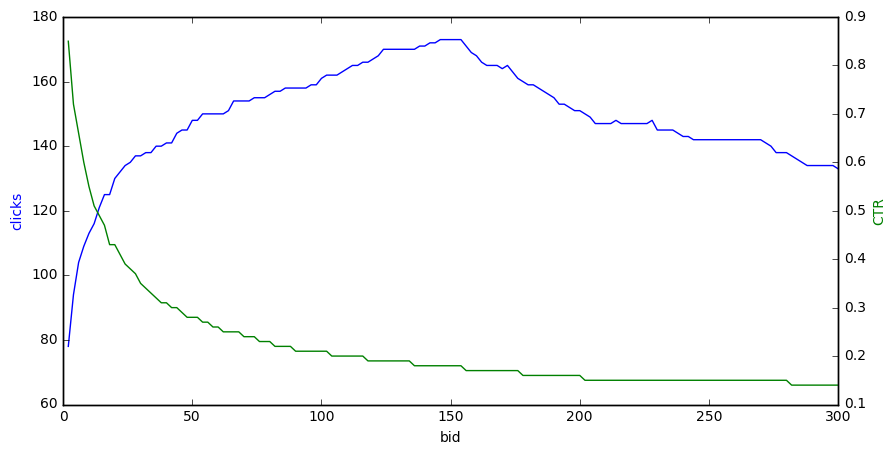

In [334]:
# Linear bidding performance
b = nonlin[['clicks','bid']].astype(float)
a = nonlin[['bid','CTR']].astype(float)

fig, ax1 = plt.subplots()
ax1.plot(b.bid,b.clicks)
ax1.set_xlabel('bid')
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.bid, a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
fig.savefig('nonlinear.PNG', dpi=100)
plt.show()

In [333]:
# Best nonlinear bid on click metric
nonlin.iloc[np.where(nonlin.clicks == nonlin.clicks.max())[0]]

,bid,bidding_strategy,imps_won,total_spend,clicks,CTR,CPM,CPC
72,146,nonlinear,95651.0,6063093.0,173,0.18,63387.66,35046.78
73,148,nonlinear,96347.0,6111590.0,173,0.18,63433.11,35327.11
74,150,nonlinear,96977.0,6155535.0,173,0.18,63474.17,35581.13
75,152,nonlinear,97654.0,6205638.0,173,0.18,63547.2,35870.74
76,154,nonlinear,98261.0,6250035.0,173,0.18,63606.47,36127.37


# 4. ORTB Bidding Strategy


ORTB = *√ c / λ  x  θ + c^2 − c

In [336]:
lambda_range = [1e-10,5e-10,1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6,5e-6,1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2,5e-2,1e-1,5e-1]
c_range = np.arange(1,21,1)

ortbbids = []
clambda = []

for c in c_range:
    for lambdas in lambda_range:
        clambda.append((c,lambdas))
        ortbbid = np.sqrt((c / lambdas * np.asarray(pred)) + c**2 - c)
        ortbbids.append(ortbbid.tolist())

In [337]:
def ORTB_bidding(bids):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
    
    bool_check = bids >= validation.payprice
    for i in range(0,len(bool_check)):
            if bool_check[i]==True:
                impression += 1.0
                clicks += validation.click[i]
                cost += validation.payprice[i]
            if cost >= budget:
                break
    return impression, clicks, cost

ortb = pd.DataFrame()
ortb['C,Lambda'] = clambda

im = []
clks = []
ct = []

starttime = time.time()
print("Starting ORTB Bidding")

for bid in ortbbids:
    [imps, clicks, cost] = ORTB_bidding(bid)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
    
ortb['imps_won'] = im
ortb.imps_won = ortb.imps_won.astype(int)
ortb['total_spend'] = ct
ortb['clicks'] = clks
ortb['CTR'] = (ortb.clicks/ortb.imps_won * 100).round(4).astype(str)
ortb['CPM'] = (ortb.total_spend/ortb.imps_won * 1000).round(2).astype(str)
ortb['CPC'] = (ortb.total_spend/ortb.clicks).round(2).astype(str)

print("ORTB Bidding Finished in %s minutes" % round(((time.time() - starttime)/60),2))

Starting ORTB Bidding
ORTB Bidding Finished in 35.6 minutes


In [339]:
# Best ortb bid on click metric
ortb.iloc[np.where(ortb.clicks == ortb.clicks.max())[0]]

,"C,Lambda",imps_won,total_spend,clicks,CTR,CPM,CPC
107,"(6, 5e-07)",144370.0,6133571.0,168,0.12,42485.08,36509.35
228,"(12, 1e-06)",146697.0,6250021.0,168,0.11,42604.97,37202.51


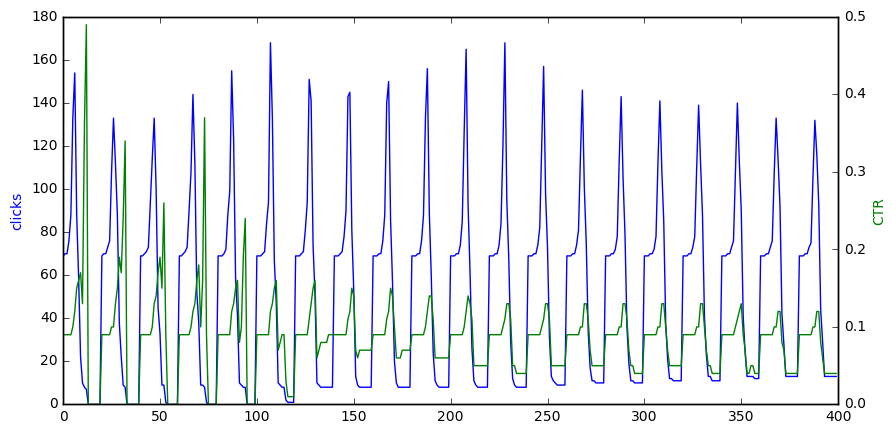

In [346]:
# Linear bidding performance
b = ortb[['clicks','C,Lambda']]
a = ortb[['C,Lambda','CTR']]

fig, ax1 = plt.subplots()
ax1.plot(b.clicks)
ax1.set_ylabel('clicks', color='b')

ax2 = ax1.twinx()
ax2.plot(a.CTR,color='g')
ax2.set_ylabel('CTR', color='g')
fig.set_size_inches(10, 5)
# fig.savefig('nonlinear.PNG', dpi=100)
plt.show()

# 5. Gate bidding strategy
if pCTR_norm > optimal_norm: bid = 300 ; else bid = 0

In [ ]:
# Gate bid generator
def gate_bid_gen():
    bids = []
    norms = np.linspace(0.8,0.9,21)
    
    for norm in norms:
        for i in range(0, len(pred)):
            if (pred[i] / avgCTR) >= norm:
                bid = 300
                bids.append(bid)         
            else:
                bid = 0
                bids.append(bid)      
    bid_chunks = [bids[x:x+len(pred)] for x in range(0, len(bids), len(pred))]
    return bid_chunks, norms

bid_chunks,norms = gate_bid_gen()

gate_df = pd.DataFrame()

im = []
clks = []
ct = []

starttime = time.time()
print("Starting gate bidding")

for bids in bid_chunks:
    [imps, clicks, cost] = bidding(bids)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
    
gate_df['bidding_strategy'] = 'gate'
gate_df['pCTR/avgCTR'] = norms
gate_df['imps_won'] = im
gate_df.imps_won = gate_df.imps_won.astype(int)
gate_df['total_spend'] = ct
gate_df['clicks'] = clks
gate_df['CTR'] = (gate_df.clicks/gate_df.imps_won * 100).round(4).astype(str)
gate_df['CPM'] = (gate_df.total_spend/gate_df.imps_won * 1000).round(2).astype(str)
gate_df['CPC'] = (gate_df.total_spend/gate_df.clicks).round(2).astype(str)
print("gate bidding finished in %s minutes"% round(((time.time() - starttime)/60),2))

# Best gate bid with highest clicks
gate_df.iloc[np.where(gate_df.clicks == gate_df.clicks.max())[0]]

In [1]:
# Best gate bid with highest clicks
gate_df.iloc[np.where(gate_df.clicks == gate_df.clicks.max())[0]]

NameError: name 'gate_df' is not defined

In [374]:
# Test bids
testbids = pd.DataFrame(nonlin.bid[72] * (pred_test / avgCTR) ** 2)
testbids.columns = ['bids']
testbids.to_csv('test_bids.csv')
testbids.head()

,bids
0,477.345791
1,27.331243
2,2.713833
3,19.641210
4,4.506116
